# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [60]:
import main
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
import math

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

In [61]:
from main import bisection


***Zadanie 1.***  
Wykonaj wykres funkcji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedziały, w którym znajdują się miejsca zerowe naszej funkcji.

W jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji?

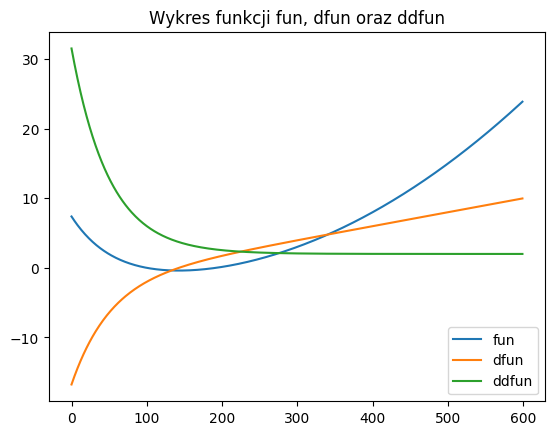

In [62]:
from main import fun, dfun, ddfun
x = np.arange(-1,5,0.01)
fun_ = []
dfun_ = []
ddfun_ = []
for i in x:
    fun_.append(fun(i))
    dfun_.append(dfun(i))
    ddfun_.append(ddfun(i))

plt.plot(fun_,label = 'fun')
plt.plot(dfun_,label = 'dfun')
plt.plot(ddfun_,label ='ddfun')    
plt.title ('Wykres funkcji fun, dfun oraz ddfun')
plt.legend()

Jeśli pochodna zmienia znak z dodatniego na ujemny w pewnym punkcie, oznacza to, że funkcja maleje i może mieć tam minimum lokalne.Miejsca, w których druga pochodna wynosi zero, mogą wskazywać na punkty przegięcia funkcji. Podsumowując, pochodna i druga pochodna mogą pomóc nam znaleźć miejsca zerowe funkcji poprzez analizę zmiany znaku pochodnej oraz punkty przegięcia funkcji poprzez badanie zmiany znaku drugiej pochodnej lub wyznaczając, czy funkcja jest wklęsła czy wypukła w danym punkcie. 

***Zadanie 2.***  
Najprostszą metodą do wyznaczenia miejsca zerowego funkcji nieliniowej jest metoda bisekcji. Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Pamiętaj, że gwarancją zbieżności działania funkcji są założenia:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) wartość funkcji na końcach przedziału przyjmuje przeciwne znaki (tzn. $f(a)*f(b)<0$)

In [63]:
from main import bisection,fun
root,iter = bisection(0.5,2,fun,10e-6,100)
print ('Funkcja osiąga miejsce zerowe dla x =',root)
print ('Wynik został osiągnięty w', iter, 'iteracji')
#funkcja działa poprawnie.

Funkcja osiąga miejsce zerowe dla x = 0.91656494140625
Wynik został osiągnięty w 13 iteracji


***Zadanie 3.***  
Inną metodą, wykorzystywaną do poszukiwania miejsca zerowego funkcji jest metoda Newtona. Wykorzystuję ona wartość pierwszej pochodnej do wyznaczenia wartości.

1) zaimplementuj iloraz różnicowy. 
2) wygeneruj wektor 10 elementowy
3) sprawdź działanie funkcji dla danego wektora oraz  $h=0.00001$ oraz z wartościami uzyskanymi z funkcją wyliczoną analityczną.

Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym $[a,b]$

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak ekstremów lokalnych i punktów przegięcia)


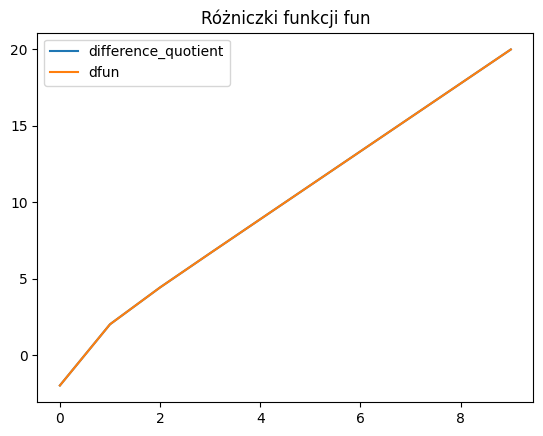

In [64]:
from main import difference_quotient
A = np.linspace(0,10,10)
h = 0.00001
dif=[]
diff=[]
for i in A:
    dif.append(difference_quotient(fun,i,h))
    diff.append(dfun(i))
plt.figure()
plt.plot(dif,label='difference_quotient')
plt.plot(diff,label='dfun')
plt.title('Różniczki funkcji fun')
plt.legend()
plt.show()

Oba wykresy pokrywają się, co wskazuje na poprawne działanie funkcji.

***Zadania 4.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [65]:
from scipy.optimize import root, fsolve

print(root(fun, x0 = 1))
print(fsolve(fun,x0 = 1))

 message: The solution converged.
 success: True
  status: 1
     fun: [ 8.882e-16]
       x: [ 9.166e-01]
    nfev: 7
    fjac: [[-1.000e+00]]
       r: [-1.513e+00]
     qtf: [-7.066e-10]
[0.91656258]


***Zadanie 5.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 4) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

[0.0, 0.007339000701904297, 0.015764951705932617, 0.019511699676513672, 0.034592628479003906, 0.02149200439453125, 0.05621480941772461, 0.036425113677978516, 0.0535578727722168, 0.060799360275268555]
[0.009666204452514648, 0.6724948883056641, 1.1810784339904785, 1.840789556503296, 2.7114784717559814, 3.2221739292144775, 4.403767108917236, 4.481307744979858, 4.751885890960693, 5.469560861587524]
[0.001001596450805664, 0.09184551239013672, 0.15245771408081055, 0.24837136268615723, 0.37372422218322754, 0.42412614822387695, 0.5819401741027832, 0.5834922790527344, 0.6254556179046631, 0.7144145965576172]
[0.0010128021240234375, 0.08347654342651367, 0.13923382759094238, 0.21014118194580078, 0.3020000457763672, 0.3720669746398926, 0.46856141090393066, 0.4765434265136719, 0.49163269996643066, 0.6173877716064453]


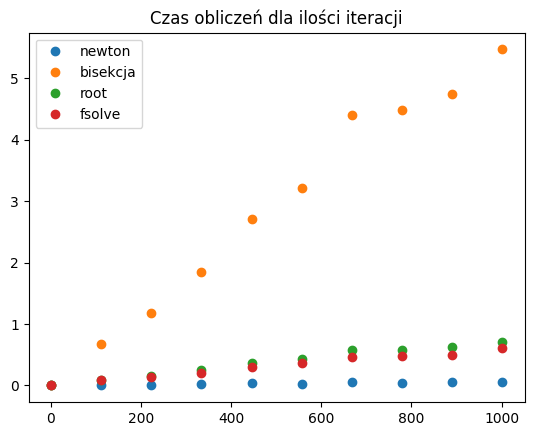

In [87]:
import time
from main import newton

def measure_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time


iterations = np.linspace(1, 1001, 10)
newton_times = []
bisection_times = []
root_times = []
fsolve_times = []

for e in iterations:
    newton_time = 0
    bisection_time = 0
    root_time = 0 
    fsolve_time = 0
    
    for i in range (int(e)):
        newton_time += measure_time(newton, fun, dfun, ddfun, 0.5, 2, 1e-10, 1000)
        bisection_time += measure_time(bisection, 0.5, 2, fun, 1e-10, 100)
        root_time += measure_time(root, fun, x0=1)
        fsolve_time += measure_time(fsolve, fun, x0=1)
        
    newton_times.append(newton_time)
    bisection_times.append(bisection_time)
    root_times.append(root_time)
    fsolve_times.append(fsolve_time)

plt.plot(iterations,newton_times,'o',label = 'newton')
plt.plot(iterations,bisection_times,'o',label = 'bisekcja')
plt.plot(iterations,root_times,'o', label = 'root')
plt.plot(iterations,fsolve_times,'o', label = 'fsolve')
plt.legend()
plt.title('Czas obliczeń dla ilości iteracji')

print(newton_times)
print(bisection_times)
print(root_times)
print(fsolve_times)
 


Najwolniejsza okazała się być metoda wyznaczania miejsc zerowych za pomocą bisekcji. Najmniej dokładna jest zato funkcja root, gdyż podaje miejsca zerowe z dużym przybliżeniem. Najszybszą a zarazem najbardziej precyzyjną wydaje się być metoda Newtona. 

Wnioski:
Na dzisiejszych zajęciach poznałem metody wyznaczania miejsc zerowych funkcji takich jak metoda newtona oraz metoda bisekcji. Przećwiczyłem również definiowanie różniczkowania funkcji. Zbadałem również które metody wyznaczania miejsc zerowych są najbardziej precyzyjne i najszybsze.